# Regresión Lineal en Python

#### El paquete scikit-learn para Regresión Lineal y la selección de rasgos.

__Eliminación de rasgos recursiva. Se le asignará el número de variables que deseas en tu modelo y el programa hará una combinación de todas las parejas posibles, con el fin de seleccionar el modelo con mejor exactitud.__

In [1]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits import mplot3d
style.use("ggplot")

In [2]:
data = pd.read_csv("../datasets/ads/Advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


RFE  = Feature ranking with recursive feature elimination.

Given an external estimator that assigns weights to features (e.g., the
coefficients of a linear model), the goal of recursive feature elimination
(RFE) is to select features by recursively considering smaller and smaller
sets of features. First, the estimator is trained on the initial set of
features and the importance of each feature is obtained either through a
``coef_`` attribute or through a ``feature_importances_`` attribute.
Then, the least important features are pruned from current set of features.
That procedure is recursively repeated on the pruned

In [3]:
feature_col = data.columns.values[:-1]
X = data[feature_col]

In [4]:
Y = data["Sales"]

In [5]:
estimator = SVR(kernel="linear")
estimator

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
selector = RFE(estimator,n_features_to_select=2,step=10)
selector

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=2, step=10, verbose=0)

In [7]:
selector = selector.fit(X,Y) # Ajustar datos a ambos modelos
selector

RFE(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
  n_features_to_select=2, step=10, verbose=0)

In [8]:
selector.get_params()

{'estimator__C': 1.0,
 'estimator__cache_size': 200,
 'estimator__coef0': 0.0,
 'estimator__degree': 3,
 'estimator__epsilon': 0.1,
 'estimator__gamma': 'auto_deprecated',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'estimator': SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
   gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
   tol=0.001, verbose=False),
 'n_features_to_select': 2,
 'step': 10,
 'verbose': 0}

In [9]:
selector.support_ # Variables seleccionadas para el modelo

array([ True,  True, False])

In [10]:
selector.ranking_ # Variables que elegiría primero

array([1, 1, 2])

In [11]:
selector.score(X,Y) # r^2 del modelo

0.8913178668703667

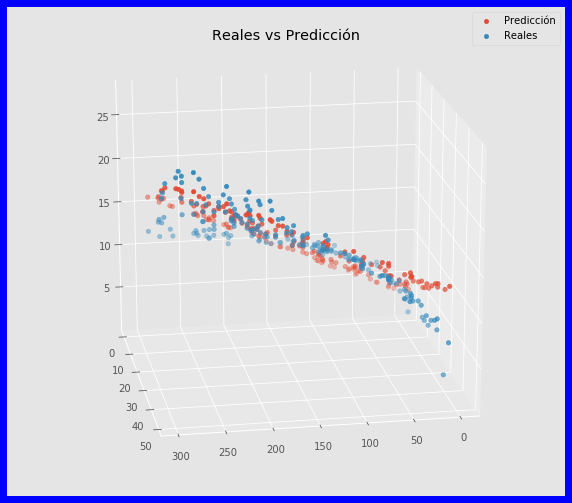

In [12]:
# Proyección en 3D de los resultados
plt.figure(figsize=(10,9),facecolor="b")
ax = plt.subplot(projection="3d")
ax.scatter3D(data.TV, data.Radio,selector.predict(X),label="Predicción")
ax.scatter3D(data.TV, data.Radio,data.Sales,label="Reales")
ax.view_init(elev=20,azim=80)
ax.set_title("Reales vs Predicción")
ax.legend()
plt.show()

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
lm = LinearRegression()
lm1 = LinearRegression()

In [15]:
lm.fit(X,Y)
lm1.fit(X.iloc[:,:2],Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
lm.score(X,Y), lm1.score(X.iloc[:,:2],Y)

(0.8972106381789521, 0.8971942610828956)

In [17]:
lm1.intercept_

2.9210999124051362

In [18]:
lm1.coef_

array([0.04575482, 0.18799423])

$\text{Sales = } 2.9219999 + 0.0475\cdot TV + 0.18799 \cdot Radio $

In [19]:
selector = RFE(lm,n_features_to_select=2,step=10)
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=2, step=10, verbose=0)

In [20]:
selector = selector.fit(X,Y)
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=2, step=10, verbose=0)

In [21]:
selector.ranking_ # Mismos resultados

array([1, 1, 2])

In [22]:
selector.score(X,Y)

0.8971942610828956